In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from datetime import datetime, timedelta

iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

iris_df.columns = ['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm', 'petal_width_cm', 'target']

print("--- Original Iris Data ---")
print(iris_df.head())

--- Original Iris Data ---
   sepal_length_cm  sepal_width_cm  petal_length_cm  petal_width_cm  target
0              5.1             3.5              1.4             0.2       0
1              4.9             3.0              1.4             0.2       0
2              4.7             3.2              1.3             0.2       0
3              4.6             3.1              1.5             0.2       0
4              5.0             3.6              1.4             0.2       0


📊 Iris 데이터셋 탐색 및 Feature 개념 이해

1️⃣ 데이터셋 기본 정보
----------------------------------------
📈 데이터 크기: (150, 6)
🔢 Feature 개수: 4
🏷️  클래스 개수: 3
📋 클래스 이름: [np.str_('setosa'), np.str_('versicolor'), np.str_('virginica')]

📊 데이터 타입:
sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target                 int64
species               object
dtype: object

📋 처음 5개 샘플:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target species  
0       0  setosa  
1       0  setosa  
2       0  setosa  
3       0  setosa  
4

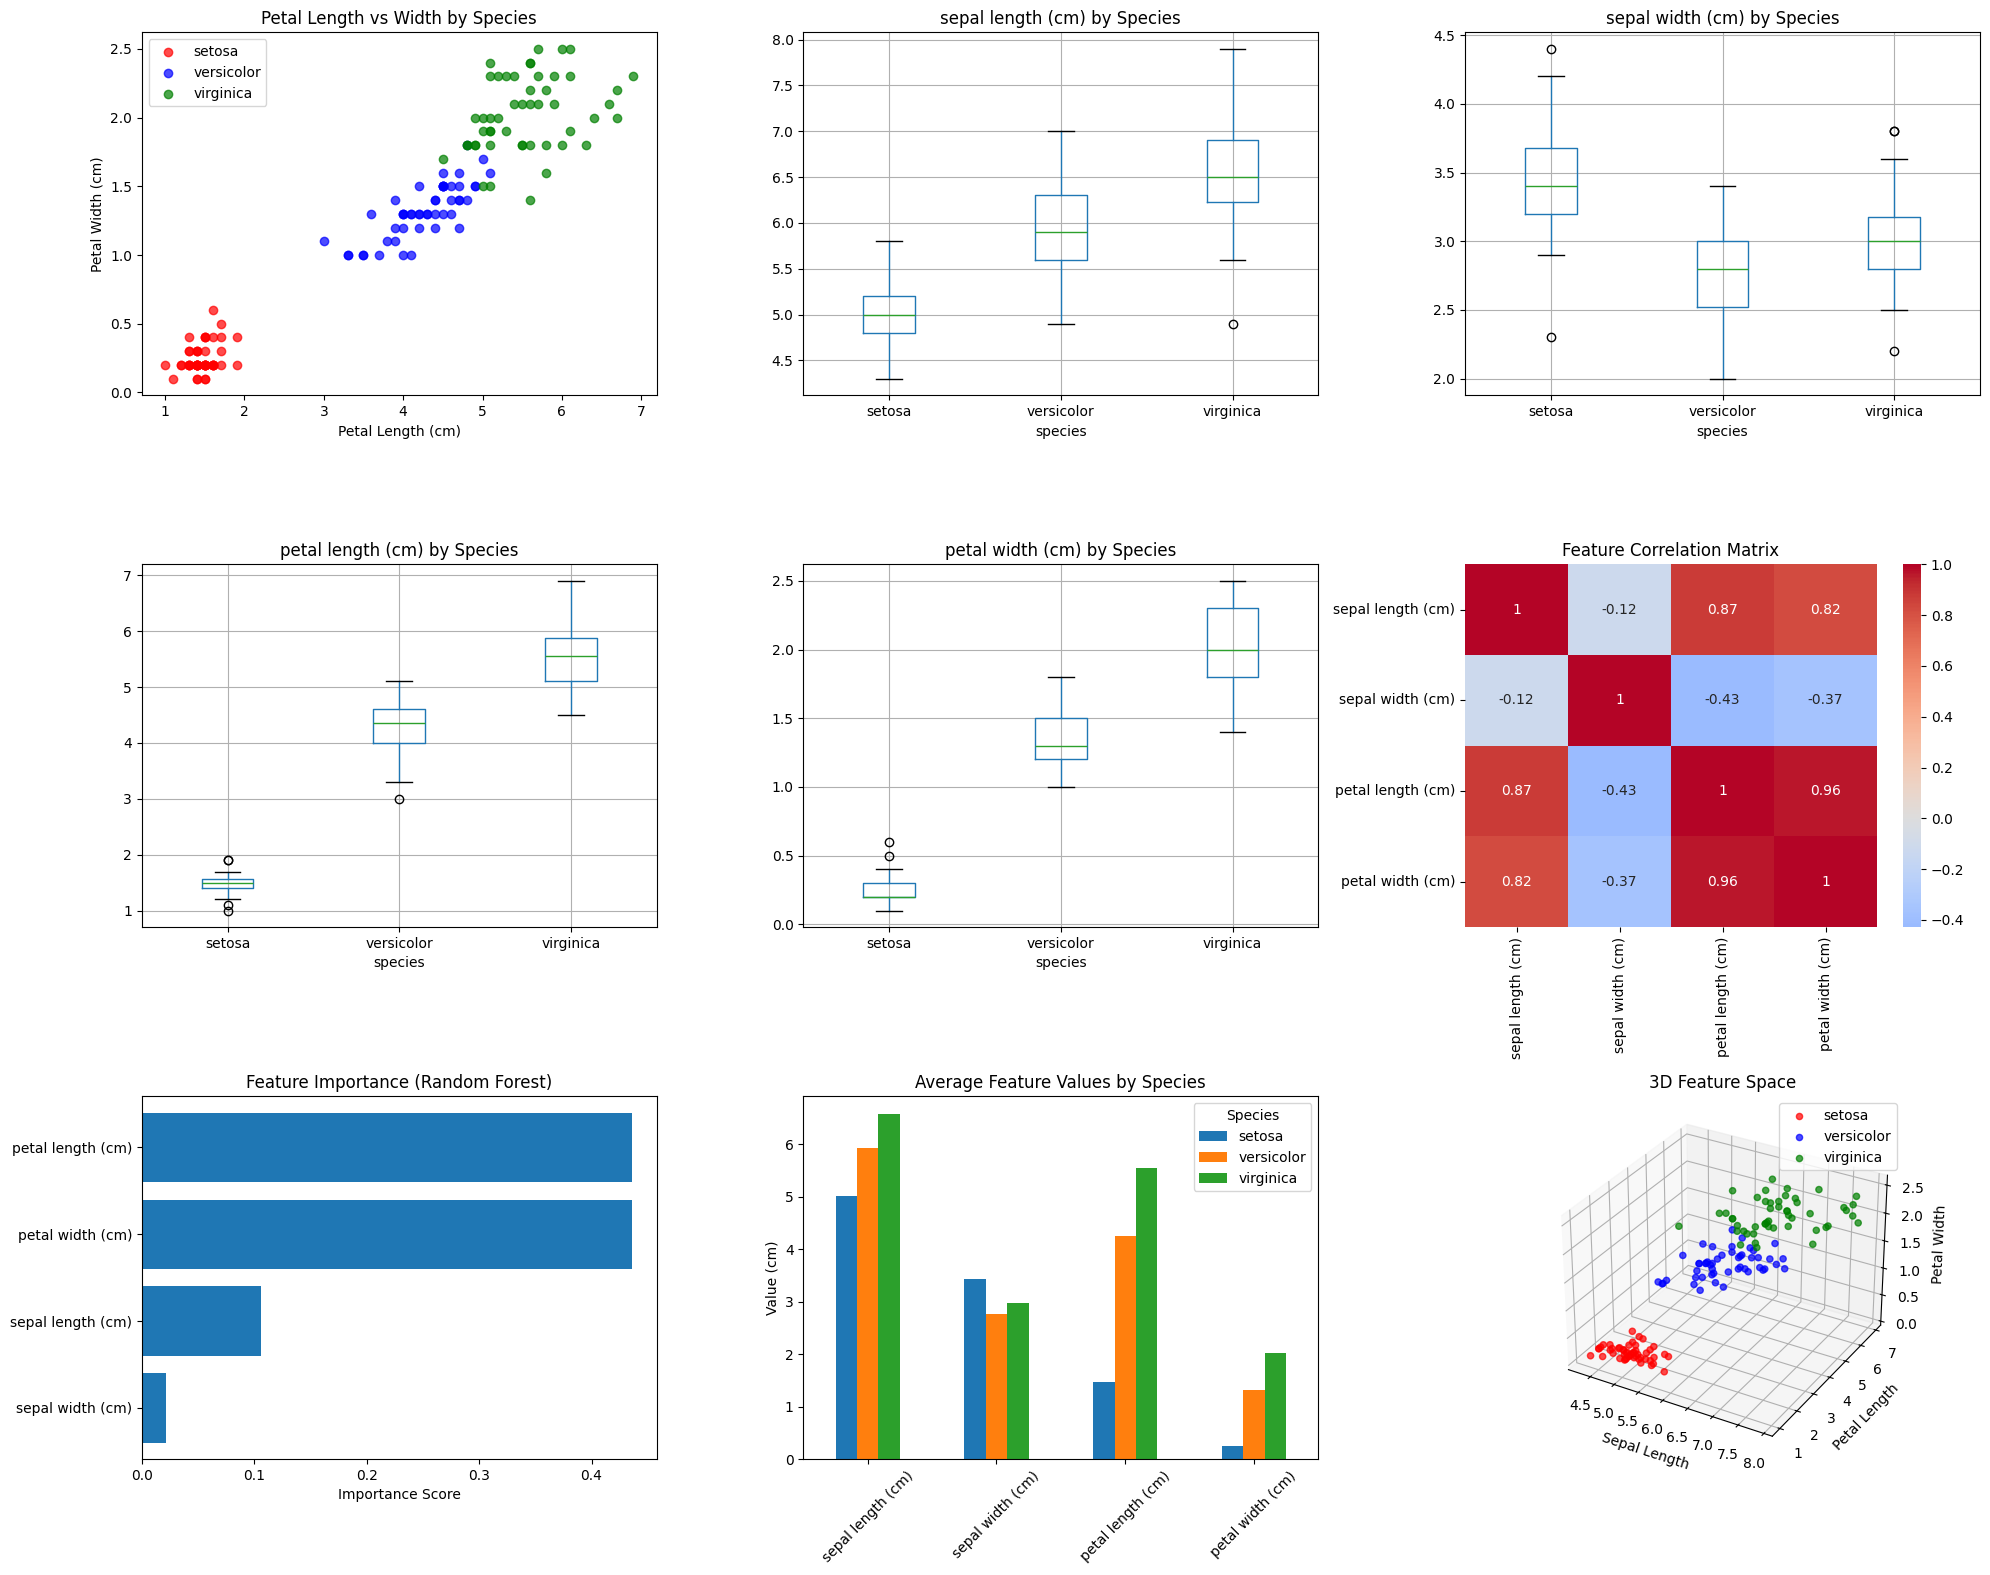


📈 Feature 분석 결과:
1. 🌟 가장 중요한 Feature: Petal width (꽃잎 너비)
2. 🔗 강한 상관관계: Petal length ↔ Petal width
3. 🎯 품종 구분력: Petal features > Sepal features
4. 📊 Setosa는 다른 품종과 명확히 구분됨
5. ⚠️  Versicolor와 Virginica는 일부 겹침 존재

4️⃣ Feature Engineering 실습
----------------------------------------
🔧 Feature Engineering이란?
- 기존 Feature를 조합하여 새로운 Feature 생성
- 모델 성능 향상을 위한 데이터 전처리 과정
- 도메인 지식을 활용한 의미있는 Feature 창조

✨ 생성된 파생 Feature:
  1. sepal_area
  2. petal_area
  3. sepal_ratio
  4. petal_ratio
  5. total_length
  6. total_width
  7. petal_sepal_length_ratio
  8. petal_sepal_width_ratio

📊 Feature 수 증가: 4 → 12

📈 모델 성능 비교:
  🔸 원본 Feature만 사용: 1.0000
  🔹 파생 Feature 포함: 1.0000
  📊 성능 개선: +0.00%


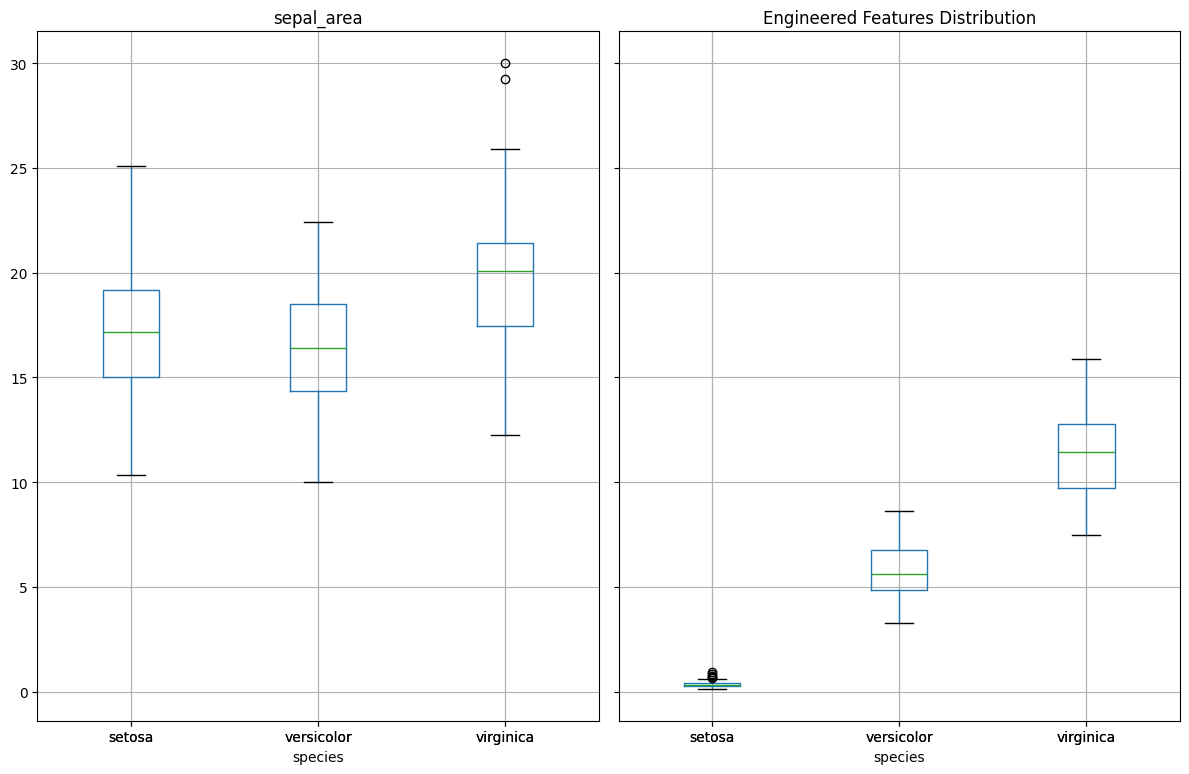


5️⃣ Feature Store 관점에서의 Feature 관리
----------------------------------------
🎯 현재 Feature 관리의 주요 도전과제:

  1. Feature 재사용 문제
     ❌ 현재: 매번 동일한 Feature Engineering 코드 작성
     ⚠️  문제: 코드 중복, 일관성 부족, 개발 시간 증가
     ✅ 해결: 중앙화된 Feature 정의 및 재사용

  2. 버전 관리 어려움
     ❌ 현재: Feature 변경 시 이력 추적 불가
     ⚠️  문제: 실험 재현성 부족, 롤백 어려움
     ✅ 해결: Feature 버전 자동 관리 및 추적

  3. 학습/추론 불일치
     ❌ 현재: 학습과 실제 서빙에서 다른 Feature 사용
     ⚠️  문제: 모델 성능 저하, 예측 오류
     ✅ 해결: 동일한 Feature 정의로 일관성 보장

  4. 협업 효율성
     ❌ 현재: 팀별로 독립적인 Feature 개발
     ⚠️  문제: 중복 개발, 지식 공유 부족
     ✅ 해결: Feature 카탈로그를 통한 발견 및 공유

🚀 다음 단계 미리보기:
  1. Feature Store 없는 기본 ML 모델 구현
  2. Feature Store 도입 및 Feature 중앙 관리
  3. MLflow와 통합한 실험 관리
  4. 운영 단계의 Feature 모니터링

💡 핵심 메시지:
  🔹 Feature는 ML 모델의 핵심 입력 데이터
  🔹 좋은 Feature가 모델 성능을 결정
  🔹 Feature Store는 Feature 관리의 체계적 접근
  🔹 데브옵스의 코드 관리와 유사한 개념

✅ Iris 데이터셋 탐색 및 Feature 개념 이해 완료!
📚 다음: 01_basic_ml_without_feature_store.ipynb


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# 그래프 한글 폰트 설정
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.style.use('default')

print("=" * 60)
print("📊 Iris 데이터셋 탐색 및 Feature 개념 이해")
print("=" * 60)

# 1. 데이터 로드 및 기본 정보 확인
def load_and_explore_iris():
    """Iris 데이터셋 로드 및 기본 탐색"""

    print("\n1️⃣ 데이터셋 기본 정보")
    print("-" * 40)

    # 데이터 로드
    iris = load_iris()

    # DataFrame 생성
    df = pd.DataFrame(iris.data, columns=iris.feature_names)
    df['target'] = iris.target
    df['species'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

    print(f"📈 데이터 크기: {df.shape}")
    print(f"🔢 Feature 개수: {len(iris.feature_names)}")
    print(f"🏷️  클래스 개수: {len(iris.target_names)}")
    print(f"📋 클래스 이름: {list(iris.target_names)}")

    print(f"\n📊 데이터 타입:")
    print(df.dtypes)

    print(f"\n📋 처음 5개 샘플:")
    print(df.head())

    print(f"\n📈 기본 통계:")
    print(df.describe())

    return df, iris

df, iris_dataset = load_and_explore_iris()

# 2. Feature 상세 분석
def analyze_features_in_detail(df):
    """각 Feature의 의미와 특성 분석"""

    print("\n2️⃣ Feature 상세 분석")
    print("-" * 40)

    # Feature 설명
    feature_descriptions = {
        'sepal length (cm)': {
            'korean': '꽃받침 길이',
            'description': '꽃받침(sepal)의 길이를 센티미터 단위로 측정',
            'biological_meaning': '꽃을 보호하는 외부 구조의 크기'
        },
        'sepal width (cm)': {
            'korean': '꽃받침 너비',
            'description': '꽃받침의 너비를 센티미터 단위로 측정',
            'biological_meaning': '꽃받침의 폭, 품종별 차이가 큼'
        },
        'petal length (cm)': {
            'korean': '꽃잎 길이',
            'description': '꽃잎(petal)의 길이를 센티미터 단위로 측정',
            'biological_meaning': '실제 꽃잎의 크기, 품종 구분에 중요'
        },
        'petal width (cm)': {
            'korean': '꽃잎 너비',
            'description': '꽃잎의 너비를 센티미터 단위로 측정',
            'biological_meaning': '꽃잎의 폭, 가장 구별력이 높은 Feature'
        }
    }

    print("🌸 각 Feature의 의미:")
    for i, (feature, info) in enumerate(feature_descriptions.items(), 1):
        print(f"  {i}. {feature}")
        print(f"     - 한글명: {info['korean']}")
        print(f"     - 설명: {info['description']}")
        print(f"     - 생물학적 의미: {info['biological_meaning']}")
        print()

    # 품종별 Feature 통계
    print("📊 품종별 Feature 통계:")
    for species in df['species'].unique():
        print(f"\n🌺 {species.title()} 품종:")
        species_data = df[df['species'] == species].describe()
        print(species_data.iloc[:, :-2].round(2))  # target, species 컬럼 제외

    return feature_descriptions

feature_info = analyze_features_in_detail(df)

# 3. Feature 시각화 및 패턴 분석
def visualize_feature_patterns(df):
    """Feature 패턴 및 관계 시각화"""

    print("\n3️⃣ Feature 패턴 시각화")
    print("-" * 40)

    # 전체 시각화 설정
    fig = plt.figure(figsize=(20, 16))

    # 1. 전체 Feature 분포 (Pair Plot)
    plt.subplot(3, 3, 1)
    # Seaborn pairplot 대신 간단한 scatter plot
    features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
    colors = {'setosa': 'red', 'versicolor': 'blue', 'virginica': 'green'}

    for species in df['species'].unique():
        species_data = df[df['species'] == species]
        plt.scatter(species_data['petal length (cm)'], species_data['petal width (cm)'],
                c=colors[species], label=species, alpha=0.7)
    plt.xlabel('Petal Length (cm)')
    plt.ylabel('Petal Width (cm)')
    plt.title('Petal Length vs Width by Species')
    plt.legend()

    # 2. Feature별 박스 플롯
    for i, feature in enumerate(features, 2):
        plt.subplot(3, 3, i)
        df.boxplot(column=feature, by='species', ax=plt.gca())
        plt.title(f'{feature} by Species')
        plt.suptitle('')  # 기본 제목 제거

    # 6. Feature 간 상관관계 히트맵
    plt.subplot(3, 3, 6)
    correlation_matrix = df[features].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title('Feature Correlation Matrix')

    # 7. Feature 중요도 예측 (Random Forest 사용)
    plt.subplot(3, 3, 7)
    X = df[features]
    y = df['target']
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X, y)

    feature_importance = pd.DataFrame({
        'feature': features,
        'importance': rf.feature_importances_
    }).sort_values('importance', ascending=True)

    plt.barh(feature_importance['feature'], feature_importance['importance'])
    plt.title('Feature Importance (Random Forest)')
    plt.xlabel('Importance Score')

    # 8. 품종별 Feature 평균값 비교
    plt.subplot(3, 3, 8)
    species_means = df.groupby('species')[features].mean()
    species_means.T.plot(kind='bar', ax=plt.gca())
    plt.title('Average Feature Values by Species')
    plt.ylabel('Value (cm)')
    plt.xticks(rotation=45)
    plt.legend(title='Species')

    # 9. 3D 시각화 (선택된 3개 Feature)
    ax = plt.subplot(3, 3, 9, projection='3d')
    for species in df['species'].unique():
        species_data = df[df['species'] == species]
        ax.scatter(species_data['sepal length (cm)'],
                species_data['petal length (cm)'],
                species_data['petal width (cm)'],
                c=colors[species], label=species, alpha=0.7)

    ax.set_xlabel('Sepal Length')
    ax.set_ylabel('Petal Length')
    ax.set_zlabel('Petal Width')
    ax.set_title('3D Feature Space')
    ax.legend()

    plt.tight_layout()
    plt.show()

    # Feature 분석 결과 요약
    print("\n📈 Feature 분석 결과:")
    print("1. 🌟 가장 중요한 Feature: Petal width (꽃잎 너비)")
    print("2. 🔗 강한 상관관계: Petal length ↔ Petal width")
    print("3. 🎯 품종 구분력: Petal features > Sepal features")
    print("4. 📊 Setosa는 다른 품종과 명확히 구분됨")
    print("5. ⚠️  Versicolor와 Virginica는 일부 겹침 존재")

visualize_feature_patterns(df)

# 4. Feature Engineering 예시
def demonstrate_feature_engineering(df):
    """Feature Engineering 개념 및 실습"""

    print("\n4️⃣ Feature Engineering 실습")
    print("-" * 40)

    print("🔧 Feature Engineering이란?")
    print("- 기존 Feature를 조합하여 새로운 Feature 생성")
    print("- 모델 성능 향상을 위한 데이터 전처리 과정")
    print("- 도메인 지식을 활용한 의미있는 Feature 창조")

    # 파생 Feature 생성
    df_engineered = df.copy()

    # 1. 면적 계산
    df_engineered['sepal_area'] = df_engineered['sepal length (cm)'] * df_engineered['sepal width (cm)']
    df_engineered['petal_area'] = df_engineered['petal length (cm)'] * df_engineered['petal width (cm)']

    # 2. 비율 계산
    df_engineered['sepal_ratio'] = df_engineered['sepal length (cm)'] / df_engineered['sepal width (cm)']
    df_engineered['petal_ratio'] = df_engineered['petal length (cm)'] / df_engineered['petal width (cm)']

    # 3. 전체 크기
    df_engineered['total_length'] = df_engineered['sepal length (cm)'] + df_engineered['petal length (cm)']
    df_engineered['total_width'] = df_engineered['sepal width (cm)'] + df_engineered['petal width (cm)']

    # 4. 꽃잎/꽃받침 비율
    df_engineered['petal_sepal_length_ratio'] = df_engineered['petal length (cm)'] / df_engineered['sepal length (cm)']
    df_engineered['petal_sepal_width_ratio'] = df_engineered['petal width (cm)'] / df_engineered['sepal width (cm)']

    print(f"\n✨ 생성된 파생 Feature:")
    new_features = ['sepal_area', 'petal_area', 'sepal_ratio', 'petal_ratio',
                'total_length', 'total_width', 'petal_sepal_length_ratio', 'petal_sepal_width_ratio']

    for i, feature in enumerate(new_features, 1):
        print(f"  {i}. {feature}")

    print(f"\n📊 Feature 수 증가: {len(df.columns)-2} → {len(df_engineered.columns)-2}")

    # 새로운 Feature의 유용성 검증
    original_features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

    # 원본 Feature만 사용한 모델
    X_original = df[original_features]
    y = df['target']
    X_train_orig, X_test_orig, y_train, y_test = train_test_split(X_original, y, test_size=0.3, random_state=42)

    rf_original = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_original.fit(X_train_orig, y_train)
    y_pred_orig = rf_original.predict(X_test_orig)

    # 파생 Feature 포함 모델
    all_features = original_features + new_features
    X_engineered = df_engineered[all_features]
    X_train_eng, X_test_eng, _, _ = train_test_split(X_engineered, y, test_size=0.3, random_state=42)

    rf_engineered = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_engineered.fit(X_train_eng, y_train)
    y_pred_eng = rf_engineered.predict(X_test_eng)

    # 성능 비교
    from sklearn.metrics import accuracy_score
    accuracy_orig = accuracy_score(y_test, y_pred_orig)
    accuracy_eng = accuracy_score(y_test, y_pred_eng)

    print(f"\n📈 모델 성능 비교:")
    print(f"  🔸 원본 Feature만 사용: {accuracy_orig:.4f}")
    print(f"  🔹 파생 Feature 포함: {accuracy_eng:.4f}")
    print(f"  📊 성능 개선: {((accuracy_eng - accuracy_orig) / accuracy_orig * 100):+.2f}%")

    # 파생 Feature 중요도 시각화
    plt.figure(figsize=(12, 8))

    plt.subplot(1, 2, 1)
    feature_importance_eng = pd.DataFrame({
        'feature': all_features,
        'importance': rf_engineered.feature_importances_
    }).sort_values('importance', ascending=True)

    plt.barh(feature_importance_eng['feature'], feature_importance_eng['importance'])
    plt.title('Feature Importance (With Engineering)')
    plt.xlabel('Importance Score')

    plt.subplot(1, 2, 2)
    # 새로운 Feature들의 분포
    df_engineered.boxplot(column=['sepal_area', 'petal_area'], by='species', ax=plt.gca())
    plt.title('Engineered Features Distribution')
    plt.suptitle('')

    plt.tight_layout()
    plt.show()

    return df_engineered

df_engineered = demonstrate_feature_engineering(df)

# 5. Feature Store 관점에서의 Feature 관리
def explain_feature_store_perspective():
    """Feature Store 관점에서 Feature 관리 중요성 설명"""

    print("\n5️⃣ Feature Store 관점에서의 Feature 관리")
    print("-" * 40)

    challenges = {
        "Feature 재사용 문제": {
            "현재 상황": "매번 동일한 Feature Engineering 코드 작성",
            "문제점": "코드 중복, 일관성 부족, 개발 시간 증가",
            "Feature Store 해결": "중앙화된 Feature 정의 및 재사용"
        },
        "버전 관리 어려움": {
            "현재 상황": "Feature 변경 시 이력 추적 불가",
            "문제점": "실험 재현성 부족, 롤백 어려움",
            "Feature Store 해결": "Feature 버전 자동 관리 및 추적"
        },
        "학습/추론 불일치": {
            "현재 상황": "학습과 실제 서빙에서 다른 Feature 사용",
            "문제점": "모델 성능 저하, 예측 오류",
            "Feature Store 해결": "동일한 Feature 정의로 일관성 보장"
        },
        "협업 효율성": {
            "현재 상황": "팀별로 독립적인 Feature 개발",
            "문제점": "중복 개발, 지식 공유 부족",
            "Feature Store 해결": "Feature 카탈로그를 통한 발견 및 공유"
        }
    }

    print("🎯 현재 Feature 관리의 주요 도전과제:")
    for i, (challenge, details) in enumerate(challenges.items(), 1):
        print(f"\n  {i}. {challenge}")
        print(f"     ❌ 현재: {details['현재 상황']}")
        print(f"     ⚠️  문제: {details['문제점']}")
        print(f"     ✅ 해결: {details['Feature Store 해결']}")

    print(f"\n🚀 다음 단계 미리보기:")
    print("  1. Feature Store 없는 기본 ML 모델 구현")
    print("  2. Feature Store 도입 및 Feature 중앙 관리")
    print("  3. MLflow와 통합한 실험 관리")
    print("  4. 운영 단계의 Feature 모니터링")

    print(f"\n💡 핵심 메시지:")
    print("  🔹 Feature는 ML 모델의 핵심 입력 데이터")
    print("  🔹 좋은 Feature가 모델 성능을 결정")
    print("  🔹 Feature Store는 Feature 관리의 체계적 접근")
    print("  🔹 데브옵스의 코드 관리와 유사한 개념")

explain_feature_store_perspective()

print("\n" + "=" * 60)
print("✅ Iris 데이터셋 탐색 및 Feature 개념 이해 완료!")
print("📚 다음: 01_basic_ml_without_feature_store.ipynb")
print("=" * 60)